# <div class="alert alert-block alert-info"> <span  style= "font-family: Times New Roman">Gradient Boosting Machine  </span> </div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Data preprocessing](#Data_preprocessing)
* [Data Visualization](#Data_Visualization)
    * [Univariate Analysis](#univariate_analysis)
* [Automated EDA](#Automated_EDA)
    * [Dataprep](#dataprep)
    * [Pandas-profiling](#pandas_profiling)
    * [Sweetviz](#sweetviz)
* [Feature Engineering](#Feature_Engineering)
    * [Correlation](#correlation)
    * [Feature Scaling](#Feature_Scaling)
    * [Feature Importance](#Feature_Importance)
        * [Using Decision Tree](#decision_tree)
        * [Using Random Forest](#random_forest)
* [Model Building](#Model_Building)
* [Evaluation metrics](#Evaluation_metrics)
* [Decision boundaries](#Decision_boundaries)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)

 <a class="anchor" id="Import_necessary_libraries"></a>

Gradient boosting is a method standing out for its prediction speed and accuracy, particularly with large and complex datasets. this algorithm has produced the best results. We already know that errors play a major role in any machine learning algorithm. There are mainly two types of error, bias error and variance error. Gradient boost algorithm helps us `minimize bias error` of the model.

Before getting into the details of this algorithm we must have some knowledge about AdaBoost Algorithm which is again a boosting method. This algorithm starts by building a decision stump and then assigning equal weights to all the data points. Then it increases the weights for all the points which are misclassified and lowers the weight for those that are easy to classify or are correctly classified. A new decision stump is made for these weighted data points. The idea behind this is to improve the predictions made by the first stump.

The main difference between these two algorithms is that Gradient boosting has `a fixed base estimator i.e., Decision Trees` whereas in AdaBoost we can change the base estimator according to our needs.

<mark>The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model. </mark>

**But how do we do that? How do we reduce the error?**

- This is done by building a new model on the errors or residuals of the previous model.

When the target column is continuous, we use **`Gradient Boosting Regressor`** whereas when it is a classification problem, we use **`Gradient Boosting Classifier`**. The only difference between the two is the **`Loss function`**. The objective here is to minimize this loss function by adding weak learners using gradient descent. Since it is based on loss function hence for regression problems, we’ll have different loss functions like **`Mean squared error (MSE)`** and for classification, we will have **`log-likelihood`**.

### Comparing and Contrasting AdaBoost and Gradient Boost

- AdaBoost is the first boosting algorithm created with a specific loss function. Gradient Boosting is a general technique that aids in looking for approximations to the additive modeling problem's answers.
- AdaBoost works best with weak learners and minimizes the loss function associated with any classification error. The problem of the differentiable loss function is solved using gradient boosting.
- Gradient Boosting uses gradients to identify the weaknesses of the weak learners, while AdaBoost uses high-weight data points to do the same.

#### Understand Gradient Boosting Algorithm with example:

Let’s understand the intuition behind Gradient boosting with the help of an example. Here our target column is continuous hence we will use Gradient Boosting Regressor.

Following is a sample from a random dataset where we have to predict the car price based on various features. The target column is price and other features are independent features.

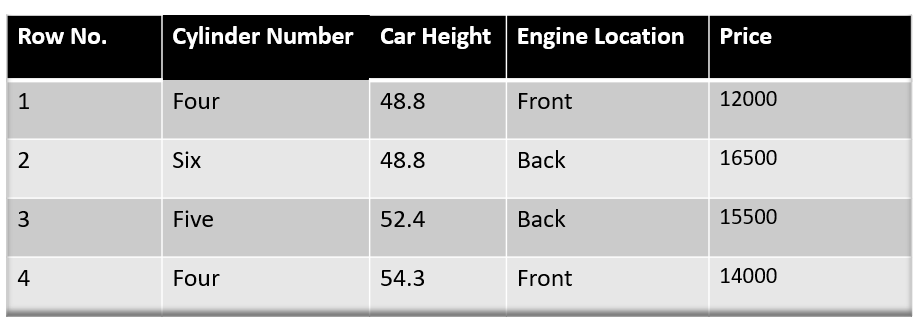



**Step -1**

 The first step in gradient boosting is to build a base model to predict the observations in the training dataset. For simplicity we take an average of the target column and assume that to be the predicted value as shown below:

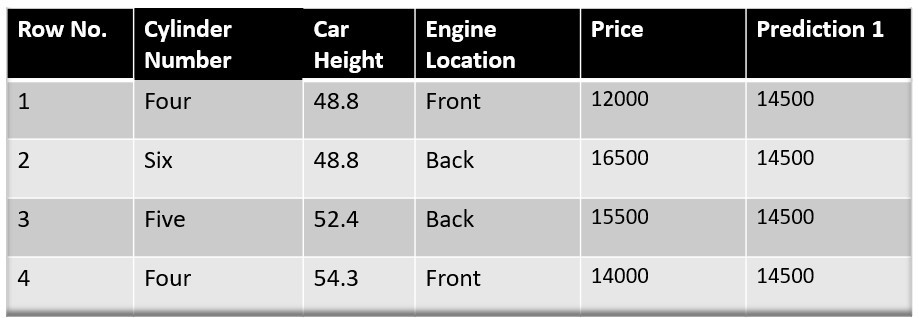

Why did I say we take the average of the target column? Well, there is math involved behind this. Mathematically the first step can be written as:

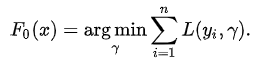

Looking at this may give you a headache, but don’t worry we will try to understand what is written here.

Here L is our loss function

Gamma is our predicted value

argmin means we have to find a predicted value/gamma for which the loss function is minimum.

Since the target column is continuous our loss function will be:

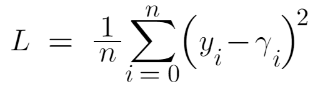

Here yi is the observed value

And gamma is the predicted value

Now we need to find a minimum value of gamma such that this loss function is minimum. We all have studied how to find minima and maxima in our 12th grade. Did we use to differentiate this loss function and then put it equal to 0 right? Yes, we will do the same here.

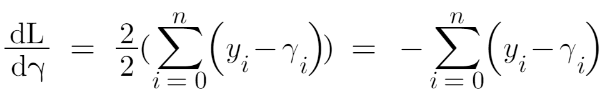

Let’s see how to do this with the help of our example. Remember that y_i is our observed value and gamma_i is our predicted value, by plugging the values in the above formula we get:

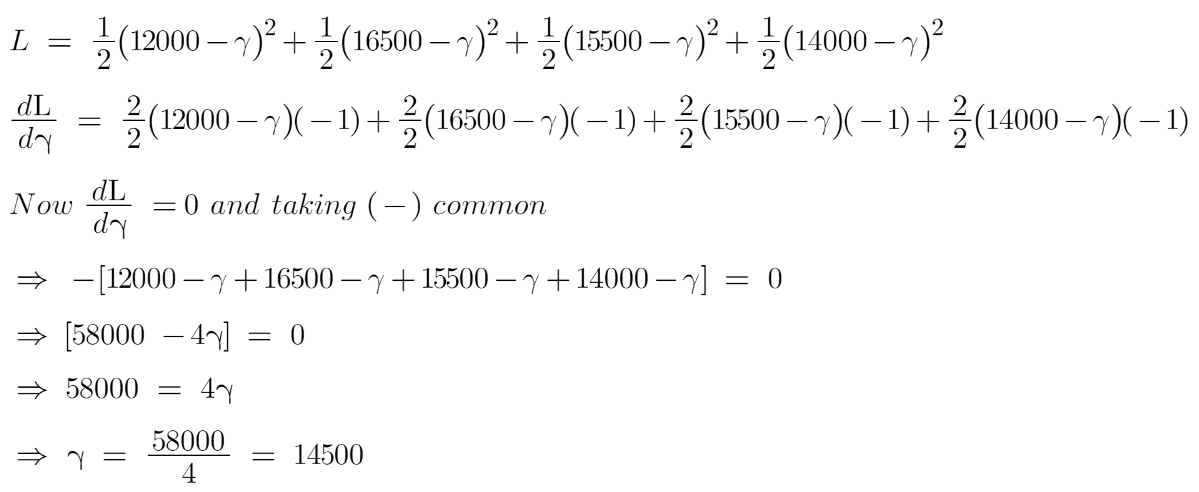

We end up over an average of the observed car price and this is why I asked you to take the average of the target column and assume it to be your first prediction.

Hence for gamma=14500, the loss function will be minimum so this value will become our prediction for the base model.

**Step-2**

 The next step is to calculate the pseudo residuals which are (observed value – predicted value)

 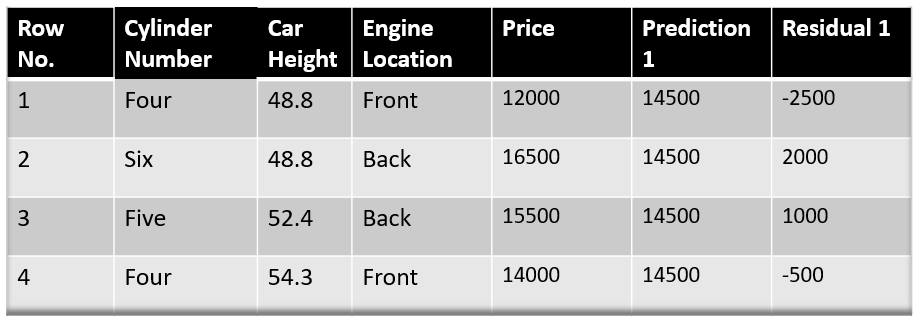

Again the question comes why only observed – predicted? Everything is mathematically proved, let’s from where did this formula come from. This step can be written as:

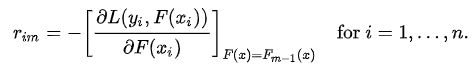

Here F(xi) is the previous model and m is the number of DT made.

We are just taking the derivative of loss function w.r.t the predicted value and we have already calculated this derivative:

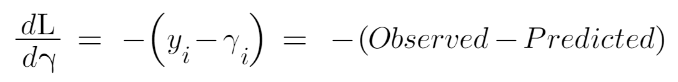

If you see the formula of residuals above, we see that the derivative of the loss function is multiplied by a negative sign, so now we get:

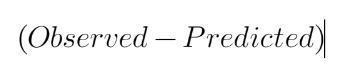

The predicted value here is the prediction made by the previous model. In our example the prediction made by the previous model (initial base model prediction) is 14500, to calculate the residuals our formula becomes:



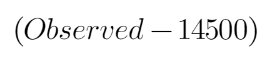

In the next step, we will build a model on these pseudo residuals and make predictions. Why do we do this? Because we want to minimize these residuals and minimizing the residuals will eventually improve our model accuracy and prediction power. So, using the Residual as target and the original feature Cylinder number, cylinder height, and Engine location we will generate new predictions. Note that the predictions, in this case, will be the error values, not the predicted car price values since our target column is an error now.

Let’s say hm(x) is our DT made on these residuals.

Step- 4 In this step we find the output values for each leaf of our decision tree. That means there might be a case where 1 leaf gets more than 1 residual, hence we need to find the final output of all the leaves. TO find the output we can simply take the average of all the numbers in a leaf, doesn’t matter if there is only 1 number or more than 1.

Let’s see why do we take the average of all the numbers. Mathematically this step can be represented as:

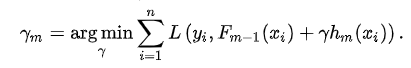

Here hm(xi) is the DT made on residuals and m is the number of DT. When m=1 we are talking about the 1st DT and when it is “M” we are talking about the last DT.

The output value for the leaf is the value of gamma that minimizes the Loss function. The left-hand side “Gamma” is the output value of a particular leaf. On the right-hand side [Fm-1(xi)+ƴhm(xi))] is similar to step 1 but here the difference is that we are taking previous predictions whereas earlier there was no previous prediction.

Let’s understand this even better with the help of an example. Suppose this is our regressor tree:

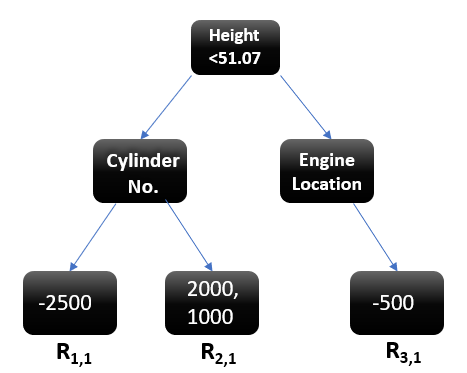

We see 1st residual goes in R1,1  ,2nd and 3rd residuals go in R2,1 and 4th residual goes in R3,1 .

Let’s calculate the output for the first leave that is R1,1

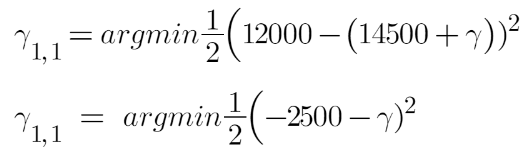

Now we need to find the value for gamma for which this function is minimum. So we find the derivative of this equation w.r.t gamma and put it equal to 0.

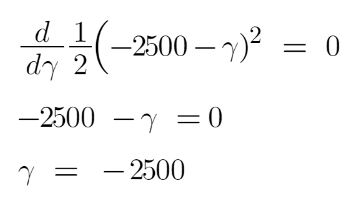

Hence the leaf R1,1 has an output value of -2500. Now let’s solve for the R2,1

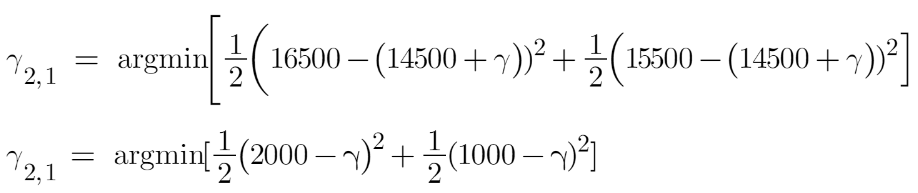



Let’s take the derivative to get the minimum value of gamma for which this function is minimum:

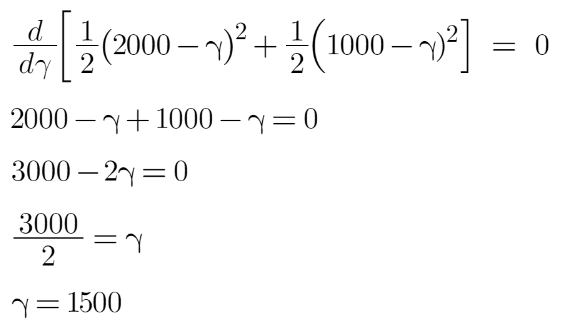

We end up with the average of the residuals in the leaf R2,1 . Hence if we get any leaf with more than 1 residual, we can simply find the average of that leaf and that will be our final output.

Now after calculating the output of all the leaves, we get:

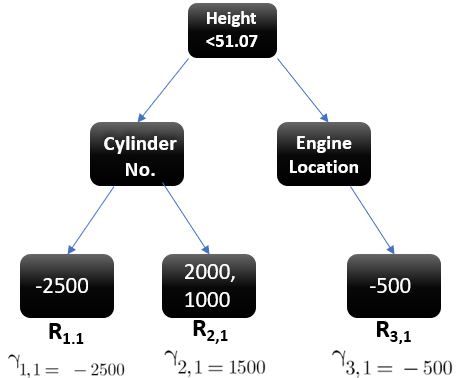

**Step-5**

 This is finally the last step where we have to update the predictions of the previous model. It can be updated as:

 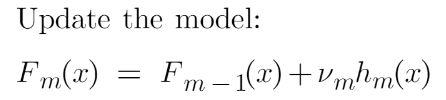


where m is the number of decision trees made.

Since we have just started building our model so our m=1. Now to make a new DT our new predictions will be:

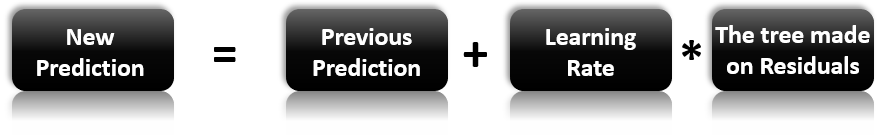

Here Fm-1(x) is the prediction of the base model (previous prediction) since F1-1=0 , F0 is our base model hence the previous prediction is 14500.

nu is the learning rate that is usually selected between 0-1. It reduces the effect each tree has on the final prediction, and this improves accuracy in the long run. Let’s take nu=0.1 in this example.

Hm(x) is the recent DT made on the residuals.

Let’s calculate the new prediction now:

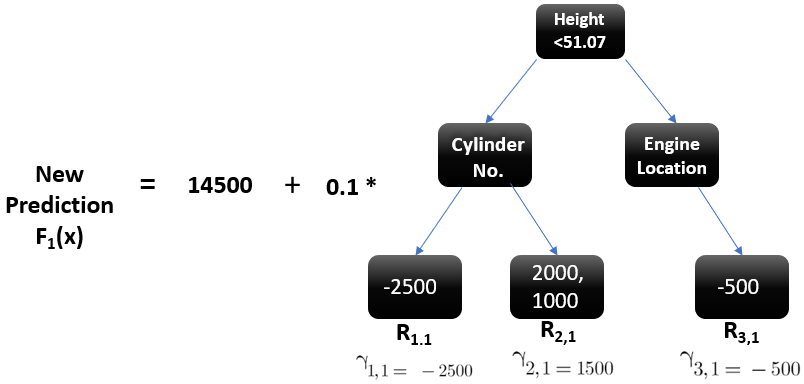

Suppose we want to find a prediction of our first data point which has a car height of 48.8. This data point will go through this decision tree and the output it gets will be multiplied with the learning rate and then added to the previous prediction.

Now let’s say m=2 which means we have built 2 decision trees and now we want to have new predictions.

This time we will add the previous prediction that is F1(x) to the new DT made on residuals. We will iterate through these steps again and again till the **loss is negligible**.

I am taking a hypothetical example here just to
make you understand how this predicts for a new dataset:

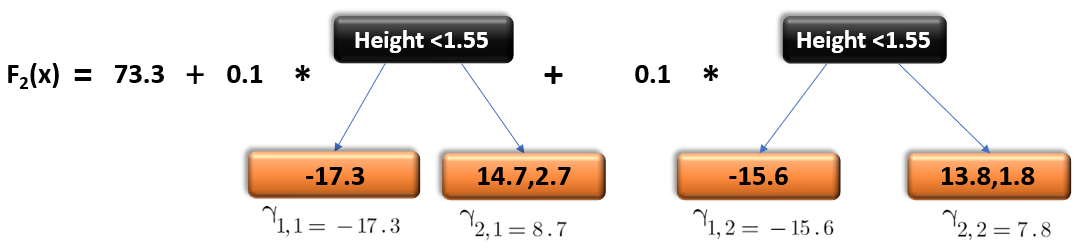

If a new data point says height = 1.40 comes, it’ll go through all the trees and then will give the prediction. Here we have only 2 trees hence the datapoint will go through these 2 trees and the final output will be F2(x).

### Gradient Boosting Machine Parameters

The overall parameters of this ensemble model can be divided into 3 categories:

1. `Tree-Specific Parameters`: These affect each individual tree in the model.
2. `Boosting Parameters`: These affect the boosting operation in the model.
3. `Miscellaneous Parameters`: Other parameters for overall functioning.

I’ll start with tree-specific parameters. First, lets look at the general structure of a decision tree:

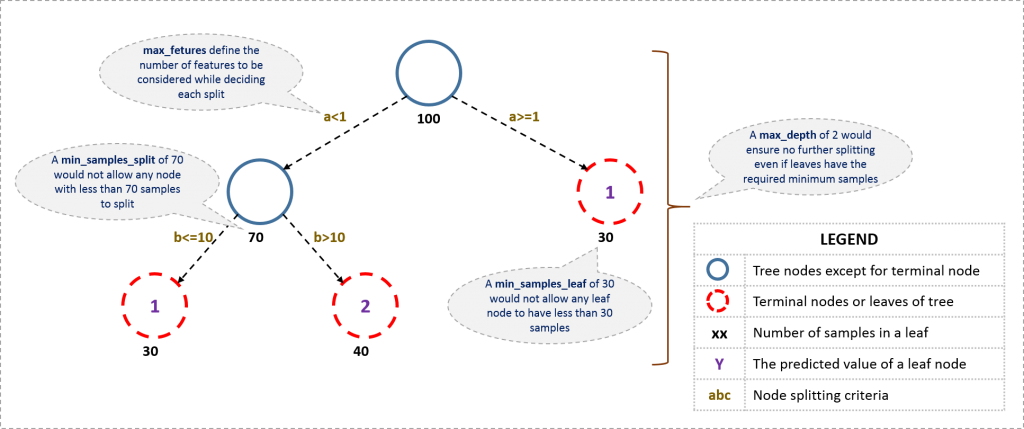

The parameters used for defining a tree are further explained below. Note that I’m using scikit-learn (python) specific terminologies here which might be different in other software packages like R. But the idea remains the same.

1. **`min_samples_split`**
* Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
* Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
* Too high values can lead to under-fitting hence, it should be tuned using CV.

2. **`min_samples_leaf`**
* Defines the minimum samples (or observations) required in a terminal node or leaf.
* Used to control over-fitting similar to min_samples_split.
* Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

3. **`min_weight_fraction_leaf`**
* Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
* Only one of #2 and #3 should be defined.

4. **`max_depth`**
* The maximum depth of a tree.
* Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
* Should be tuned using CV.

5. **`max_leaf_nodes`**
* The maximum number of terminal nodes or leaves in a tree.
* Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
* If this is defined, GBM will ignore max_depth.

6. **`max_features`**
* The number of features to consider while searching for a best split. These will be randomly selected.
* As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
* Higher values can lead to over-fitting but depends on case to case.


### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman"> **Objective:** To predict the loan status of the customers.  </span> </div>

##  <mark> <span  style= "font-family: Times New Roman">Importing necessary  libraries  </span> </mark>  <a class="anchor" id="Import_necessary_libraries"></a>

### Lets see the functioning of the algorithm with an example:

Download dataset from here: 
To open this link <a href='https://drive.google.com/file/d/18vznzuiCMiXsVM8pAvrFS-OIwiHD5QyV/view?usp=share_link' title='Google Drive'> Click here

In [1]:
# Basic Python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [2]:
# Import warnings library and ignore them using this filter function
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import plotly libraries to use more predefined plots and animations
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Initiates the plotly interactive notebook mode 
# iplots are interactive plots means zoom,hover,toggle, such interactions can be easily done
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [4]:
# display from scientific notation to floating format
pd.options.display.float_format = '{:.4f}'.format

In [5]:
# Plotting in notebook; If it is in colab; define 'colab'
import plotly.io as pio
pio.renderers.default='notebook'

In [6]:
# Importing libraries for model building
from sklearn.metrics import classification_report,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics

In [7]:
# Importing Gradient Boost Libraries
from sklearn.ensemble import GradientBoostingClassifier

# For base estimators in Gradient Boost
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# For feature importance and Decision Boundary
from sklearn.ensemble import RandomForestClassifier

##  <mark> <span  style= "font-family: Times New Roman">Data Loading  </span> </mark> <a class="anchor" id="Data_loading"></a>

In [8]:
# Reading csv file
df = pd.read_csv('loan.csv')

In [9]:
# Display the data
df.head()

loan_amnt       term  int_rate  emp_length home_ownership  annual_inc  \
0       5000  36 months   10.6500     10.0000           RENT  24000.0000   
1       2500  60 months   15.2700      0.0000           RENT  30000.0000   
2       2400  36 months   15.9600     10.0000           RENT  12252.0000   
3      10000  36 months   13.4900     10.0000           RENT  49200.0000   
4       5000  36 months    7.9000      3.0000           RENT  36000.0000   

          purpose addr_state     dti  delinq_2yrs  revol_util  total_acc  \
0     credit_card         AZ 27.6500       0.0000     83.7000     9.0000   
1             car         GA  1.0000       0.0000      9.4000     4.0000   
2  small_business         IL  8.7200       0.0000     98.5000    10.0000   
3           other         CA 20.0000       0.0000     21.0000    37.0000   
4         wedding         AZ 11.2000       0.0000     28.3000    12.0000   

   bad_loan  longest_credit_length verification_status  
0         0                26.0000            verified  
1         1                12.0000            verified  
2         0                10.0000        not verified  
3         0                15.0000            verified  
4         0                 7.0000            verified

##  <mark> <span  style= "font-family: Times New Roman">Data preprocessing  </span> </mark>  <a class="anchor" id="Data_preprocessing"></a>

In [10]:
# Displays rows and columns count
df.shape

(163987, 15)

In [11]:
# Counts the sum of all null values for every feature
df.isnull().sum()

loan_amnt                   0
term                        3
int_rate                    0
emp_length               5804
home_ownership             31
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [12]:
# Gives all the basic statistical results
# We can observe central tendency features along with standard deviation
# We can also estimate the approximate outlier analysis from this data
df.describe()

loan_amnt    int_rate  emp_length   annual_inc         dti  \
count 163987.0000 163987.0000 158183.0000  163983.0000 163987.0000   
mean   13074.1691     13.7159      5.6844   71915.6705     15.8815   
std     7993.5562      4.3919      3.6107   59070.9157      7.5877   
min      500.0000      5.4200      0.0000    1896.0000      0.0000   
25%     7000.0000     10.6500      2.0000   45000.0000     10.2300   
50%    11325.0000     13.4900      6.0000   61000.0000     15.6200   
75%    18000.0000     16.3200     10.0000   85000.0000     21.2600   
max    35000.0000     26.0600     10.0000 7141778.0000     39.9900   

       delinq_2yrs  revol_util   total_acc    bad_loan  longest_credit_length  
count  163958.0000 163794.0000 163958.0000 163987.0000            163958.0000  
mean        0.2274     54.0792     24.5797      0.1830                14.8543  
std         0.6942     25.2854     11.6852      0.3867                 6.9477  
min         0.0000      0.0000      1.0000      0.0000                 0.0000  
25%         0.0000     35.6000     16.0000      0.0000                10.0000  
50%         0.0000     55.8000     23.0000      0.0000                14.0000  
75%         0.0000     74.2000     31.0000      0.0000                18.0000  
max        29.0000    150.7000    118.0000      1.0000                65.0000

In [13]:
# drop duplicates 
df.drop_duplicates(inplace=True)
df.shape

(163987, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163984 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163956 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [15]:
# sum of null values
df.isnull().sum()

loan_amnt                   0
term                        3
int_rate                    0
emp_length               5804
home_ownership             31
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [16]:
# Remove null values; dropping them
df.dropna(inplace=True)
df.shape

(157967, 15)

## <mark> Data cleaning  <a class="anchor" id="Data_cleaning"></a>

In [17]:
df.head(2)

loan_amnt       term  int_rate  emp_length home_ownership  annual_inc  \
0       5000  36 months   10.6500     10.0000           RENT  24000.0000   
1       2500  60 months   15.2700      0.0000           RENT  30000.0000   

       purpose addr_state     dti  delinq_2yrs  revol_util  total_acc  \
0  credit_card         AZ 27.6500       0.0000     83.7000     9.0000   
1          car         GA  1.0000       0.0000      9.4000     4.0000   

   bad_loan  longest_credit_length verification_status  
0         0                26.0000            verified  
1         1                12.0000            verified

In [18]:
### Make a list of requirements and solve them
##................................................................
# Remove months in term and convert it from object to int datatype
# change column names

In [19]:
# Remove months in term and convert it from object to int datatype
# split the object as string and take the first one of the two and convert them to int
# Important: Re-executing the same cell throws 'AttributeError' as the data is changed. Run from above to see the change.
df['term'] = df['term'].str.split().str[0]
df['term'] = df['term'].astype(int)
df.head(2)

loan_amnt  term  int_rate  emp_length home_ownership  annual_inc  \
0       5000    36   10.6500     10.0000           RENT  24000.0000   
1       2500    60   15.2700      0.0000           RENT  30000.0000   

       purpose addr_state     dti  delinq_2yrs  revol_util  total_acc  \
0  credit_card         AZ 27.6500       0.0000     83.7000     9.0000   
1          car         GA  1.0000       0.0000      9.4000     4.0000   

   bad_loan  longest_credit_length verification_status  
0         0                26.0000            verified  
1         1                12.0000            verified

In [20]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

## `Data Interpretation`  <a class="anchor" id="Data_interpretation"></a>

<mark>**We should understand the variables before preprocessing it.** </mark><br>
- **purpose:** "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other"
- **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit
- **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **bad_loan**: Loan that is unlikely to be paid to the accountant.

In [21]:
# we can change column names to convenient format
df.rename(columns = {'loan_amnt':'loan_amount', 'int_rate':'interest_rate', 'emp_length':'employee_length',
       'annual_inc':'annual_income', 'addr_state':'address_state', 'dti':'Debt_to_Income', 'delinq_2yrs':'due_count',
       'revol_util':'utilization_rate', 'total_acc':'no_of_accounts','verification_status':'status'},inplace=True)
df.columns

Index(['loan_amount', 'term', 'interest_rate', 'employee_length',
       'home_ownership', 'annual_income', 'purpose', 'address_state',
       'Debt_to_Income', 'due_count', 'utilization_rate', 'no_of_accounts',
       'bad_loan', 'longest_credit_length', 'status'],
      dtype='object')

## <mark>EDA <a class="anchor" id="EDA"></a>

In [22]:
### Make a list of requirements and solve them
##................................................................
# Divide into numerical and categorical variables
# Value counts of every category variable
# Plots for categorical and numerical seperately using matplotlib,seaborn and plotly
# Encode the categorical variables
# Transforming the variables - annual_income --> log_annual_income

In [23]:
# Divide into numerical and categorical variables
# As we changed all the non-categorical object data into numerical, we can do this:
df_numerical = df[['loan_amount','interest_rate','annual_income','Debt_to_Income','utilization_rate','no_of_accounts']]
df_categorical = df[['term','employee_length','home_ownership','purpose','address_state','due_count','bad_loan','longest_credit_length','status']]

In [24]:
df_categorical.shape

(157967, 9)

In [25]:
df_numerical.shape

(157967, 6)

In [26]:
df_numerical.head(2)

loan_amount  interest_rate  annual_income  Debt_to_Income  \
0         5000        10.6500     24000.0000         27.6500   
1         2500        15.2700     30000.0000          1.0000   

   utilization_rate  no_of_accounts  
0           83.7000          9.0000  
1            9.4000          4.0000

In [27]:
df_categorical.head(2)

term  employee_length home_ownership      purpose address_state  due_count  \
0    36          10.0000           RENT  credit_card            AZ     0.0000   
1    60           0.0000           RENT          car            GA     0.0000   

   bad_loan  longest_credit_length    status  
0         0                26.0000  verified  
1         1                12.0000  verified

In [28]:
# Value counts of every category variable
for col in df_categorical.columns:
    print('===========================')
    print('{}'.format(col.upper()))
    print( df_categorical[col].value_counts())

TERM
36    124759
60     33208
Name: term, dtype: int64
EMPLOYEE_LENGTH
10.0000    47139
2.0000     15746
0.0000     14200
3.0000     13597
5.0000     12331
1.0000     11392
4.0000     11008
6.0000      9984
7.0000      9069
8.0000      7419
9.0000      6082
Name: employee_length, dtype: int64
HOME_OWNERSHIP
MORTGAGE    76947
RENT        68315
OWN         12552
OTHER         153
Name: home_ownership, dtype: int64
PURPOSE
debt_consolidation    90258
credit_card           29555
other                  9946
home_improvement       9426
major_purchase         4481
small_business         3741
car                    2724
medical                1912
wedding                1729
moving                 1394
house                  1196
vacation               1013
educational             407
renewable_energy        185
Name: purpose, dtype: int64
ADDRESS_STATE
CA    27723
NY    13749
TX    11789
FL    10893
NJ     6266
IL     5914
PA     5230
VA     5137
GA     5001
OH     4706
NC     4214
MA     40

In [29]:
# Plots for categorical and numerical seperately using matplotlib,seaborn and plotly
# Always, try to plot before encoding so that labels can be seen in original format

In [30]:
df_numerical.columns

Index(['loan_amount', 'interest_rate', 'annual_income', 'Debt_to_Income',
       'utilization_rate', 'no_of_accounts'],
      dtype='object')

In [31]:
df_categorical.columns

Index(['term', 'employee_length', 'home_ownership', 'purpose', 'address_state',
       'due_count', 'bad_loan', 'longest_credit_length', 'status'],
      dtype='object')

In [32]:
#Writing a function to plot the count and pie plot
def plot_data(column):
    # 1 row and 2 columns subplots definition
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    # Fixing supertitle
    fig.suptitle(column,fontsize=20)
    
    # count plot in first plot with the given column as axes[0]
    sns.countplot(ax=axes[0],x=column,data=df)
    # set the title of the plot
    axes[0].set_title('Count of {}s'.format(column),fontsize=20)
    # If there are more than 5 categories in the column, rotate labels
    if df[column].value_counts().index.size>5:
        # set labels and Rotate labels 
        axes[0].set_xticklabels(labels=df[column].value_counts().index,rotation=90)

    # pie plot in second plot of defined subplots
    axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
    # fix the title of the plot
    plt.title('Count of {}s'.format(column))
    plt.show()

In [33]:
# Writing a function to operate the same for all the features.
def plot_data_wrt_status(column):
    # 1 row and 2 columns subplots definition
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    # Fixing supertitle
    fig.suptitle(column,fontsize=20)
    
    # count plot in first plot with the given column w.r.t output as axes[0]
    sns.countplot(ax=axes[0],x=column,hue='status',data=df)
    axes[0].set_title('Count of {} with respect to Status'.format(column),fontsize=15)
    if df[column].value_counts().index.size>5:
        axes[0].set_xticklabels(labels=df[column].value_counts().index,rotation=90)
    
    # pie plot in second plot of defined subplots
    axes[1] = plt.pie(df.groupby(column)['status'].value_counts().values,labels=df.groupby(column)['status'].value_counts().index,radius=1.2,autopct='%1.2f%%')
    plt.title('Percentage of {}s repurchased'.format(column))
    plt.show()

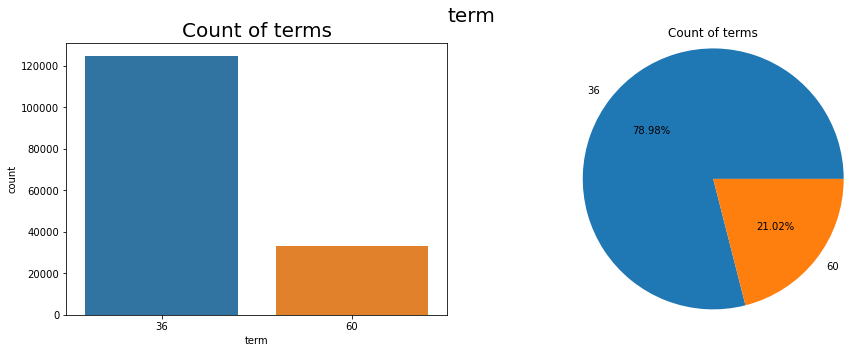

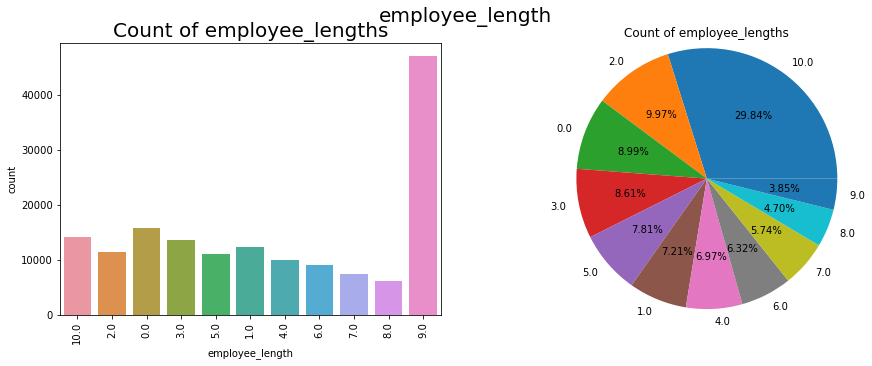

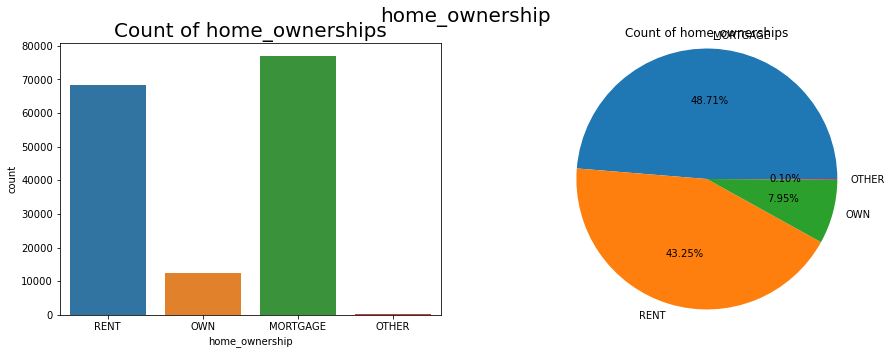

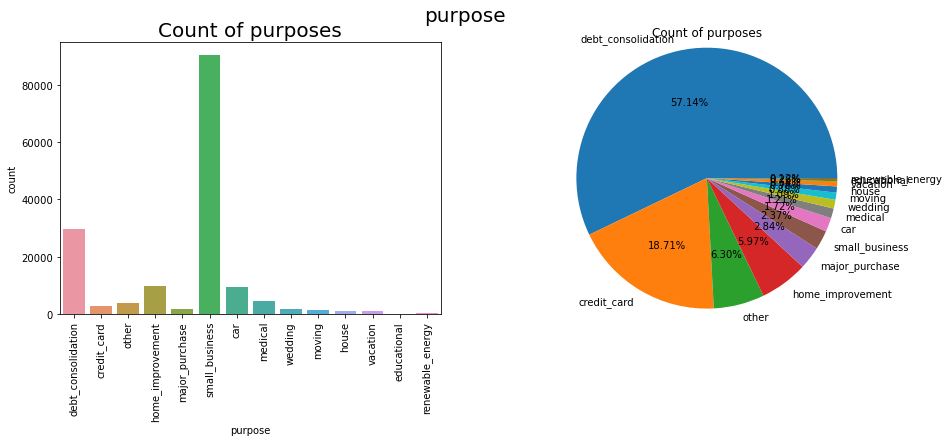

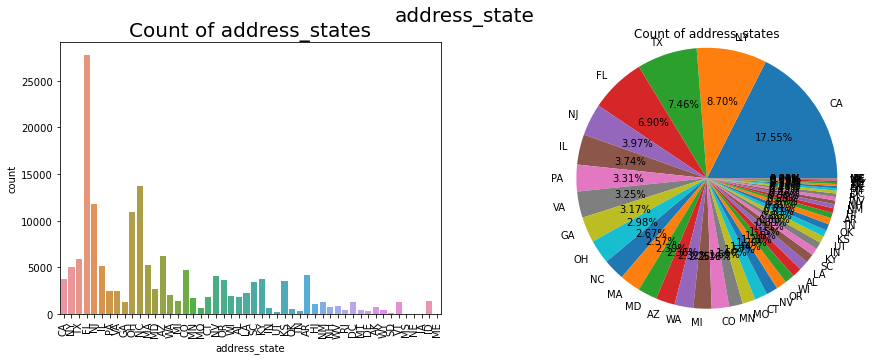

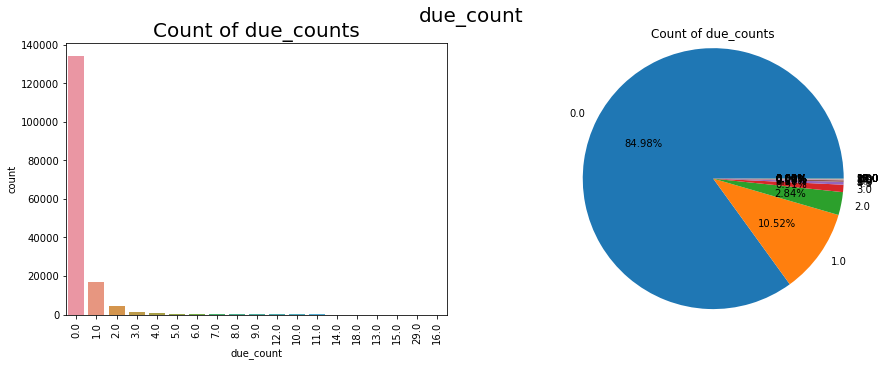

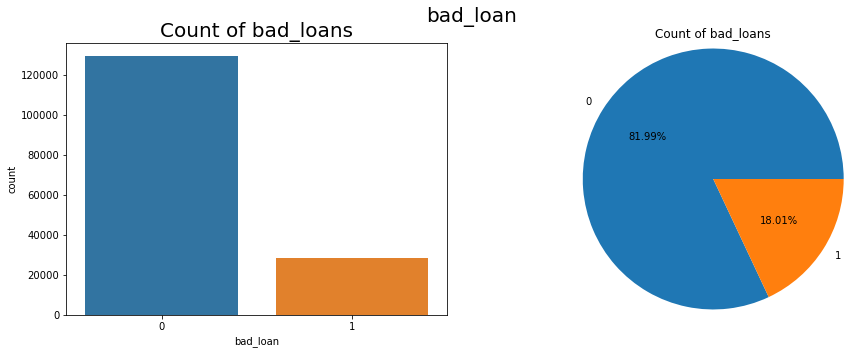

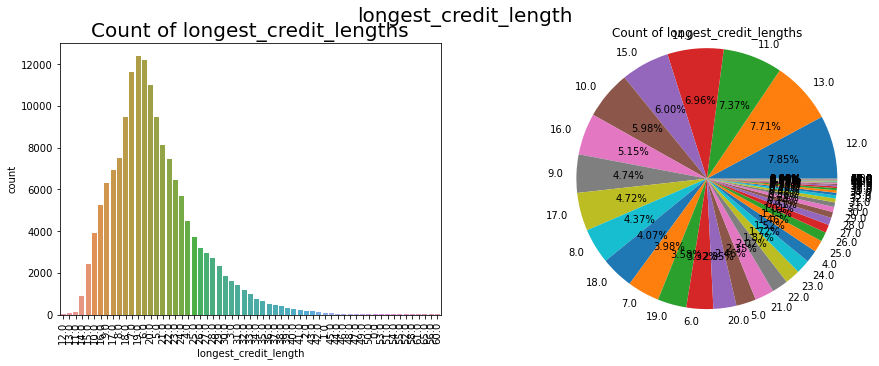

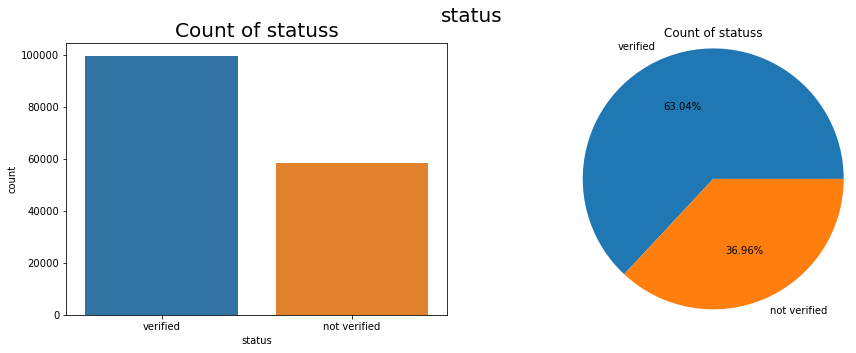

In [34]:
for col in df_categorical.columns:
    plot_data(col)

In [ ]:
for col in df_categorical.columns:
    plot_data_wrt_status(col)

In [36]:
# defining my color_palette. 
# We can customise in a way we can define our own plots

colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)
colors_1 = ['#1D4851','#9AB5BC','#FF9001','#FF4701']
sns.color_palette(colors_1)
colors_2 = ['#0D110F','#6F8C64','#FDD584','#2A4731']
sns.color_palette(colors_2)
colors_3 = ['#0B0B11','#8288C3','#242961','#D0BED4']
sns.color_palette(colors_3)
colors_4 = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors_4)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

**A few plots above are not perfectly understandable unless made it to higher radii. Lets make it interactive with plotly!!**

In [ ]:
for i in df_categorical.columns:
    fig10 = px.histogram(data_frame=df_categorical,x=i, color=df['status'], barmode='group', height=750, width=800,text_auto=True,
                         marginal='violin',labels=i,color_discrete_sequence=colors[2:4],title='{} distribution'.format(i))
    fig10.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
    fig10.show()

In [38]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_categorical['home_ownership'].value_counts().index, values=df['home_ownership'].value_counts(), name="Ownership"),1, 1)
fig.add_trace(go.Pie(labels=df_categorical['status'].value_counts().index, values=df['status'].value_counts(), name="Status"),1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(title_text="Ownership and Status Distributions",annotations=[dict(text='Home Ownership', x=0.14, y=0.5, font_size=15, showarrow=False),
                 dict(text='Status', x=0.81, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [39]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_categorical['bad_loan'].value_counts().index, values=df['bad_loan'].value_counts(), name="Bad loan"),1, 1)
fig.add_trace(go.Pie(labels=df_categorical['term'].value_counts().index, values=df['term'].value_counts(), name="Term"),1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(title_text="Ownership and Status Distributions",annotations=[dict(text='Home Ownership', x=0.14, y=0.5, font_size=15, showarrow=False),
                 dict(text='Status', x=0.81, y=0.5, font_size=15, showarrow=False)])
fig.show()

In [40]:
# Lets plot for categorical columns first
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['home_ownership', 'purpose', 'address_state', 'status'])

fig.add_trace(go.Bar(x=df['home_ownership'].value_counts().index, y=df['home_ownership'].value_counts().values, 
                     text=(df['home_ownership'].value_counts()*100/df['home_ownership'].shape[0]).round(2), width=[1, 1], marker={'color':colors[0]}), row=1, col=1)
fig.add_trace(go.Bar(x=df['purpose'].value_counts().index, y=df['purpose'].value_counts().values, 
                     text=(df['purpose'].value_counts()*100/df['purpose'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[1]}), row=1, col=2)
fig.add_trace(go.Bar(x=df['address_state'].value_counts().index, y=df['address_state'].value_counts().values, 
                     text=(df['address_state'].value_counts()*100/df['address_state'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[2]}), row=2, col=1)
fig.add_trace(go.Bar(x=df['status'].value_counts().index, y=df['status'].value_counts().values, 
                     text=(df['status'].value_counts()*100/df['status'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[3]}), row=2, col=2)

fig.update_layout(height=750, showlegend=False)
fig.show()

In [41]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['longest_credit_length','employee_length','due_count','bad_loan'])

fig.add_trace(go.Bar(x=df['longest_credit_length'].value_counts().index, y=df['longest_credit_length'].value_counts().values, 
                     text=(df['longest_credit_length'].value_counts()*100/df['longest_credit_length'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[0]}), row=1, col=1)
fig.add_trace(go.Bar(x=df['employee_length'].value_counts().index,y=df['employee_length'].value_counts().values, 
                     text=(df['employee_length'].value_counts()*100/df['employee_length'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[1]}), row=1, col=2)
fig.add_trace(go.Bar(x=df['due_count'].value_counts().index, y=df['due_count'].value_counts().values, 
                     text=(df['due_count'].value_counts()*100/df['due_count'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[2]}), row=2, col=1)
fig.add_trace(go.Bar(x=df['bad_loan'].value_counts().index, y=df['bad_loan'].value_counts().values, 
                     text=(df['bad_loan'].value_counts()*100/df['bad_loan'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[3]}), row=2, col=2)
fig.update_xaxes(type='category')
fig.update_layout(height=750, showlegend=False)
fig.show()

In [42]:
fig1 = px.histogram(df,x='loan_amount',barmode='group',title="<b>Loan amount distribution<b>")
fig1.update_layout(width=900,height=700,bargap=0.2)
fig1.show()

In [43]:
# Lets plot a Distribution in different ownerships vs loan_amount
fig5 = px.histogram(df, x='loan_amount', facet_col='home_ownership', height=300, color_discrete_sequence=colors_2[1:],title='Distribution in different ownerships vs loan_amount')
fig5.show()

In [44]:
df_numerical.columns

Index(['loan_amount', 'interest_rate', 'annual_income', 'Debt_to_Income',
       'utilization_rate', 'no_of_accounts'],
      dtype='object')

In [45]:
fig1 = px.histogram(df,x='term',barmode='group',title="<b>term distribution<b>")
fig1.update_layout(width=900,height=700,bargap=0.2)
fig1.show()

In [46]:
fig1 = px.histogram(df,x='interest_rate',barmode='group',title="<b>Interest rate distribution<b>")
fig1.update_layout(width=900,height=700,bargap=0.2)
fig1.show()

In [47]:
# Interest rate variation for different terms people
fig5 = px.histogram(df, x='interest_rate', facet_col='term', height=300, color_discrete_sequence=colors_4[0:],title='Distribution of interest_rate in both terms')
fig5.show()
# From the output it seems like the interest rate is high for 36 months loan than the 60 months.

In [48]:
# For all numerical columns:
# Lets plot histogram, distribution plot and a box plot

In [49]:
# Defining a function to plot Histogram, distribution plot and a boxplot
# Inputting the feature name and the color palette decided above.
def plot_data_new(column,clr):
    # figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column.upper(),fontsize=20,fontstyle='oblique')

    # Histogram is plotted, axes[0] gives the sequential plot number, color is given from the colors list
    sns.histplot(ax=axes[0],x=column,data=df,color=clr[1])
    # Title name is formatted with custom fontsize
    axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    #axes[0].set_title('Histogram of {} \n std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(column,
     #                       df[column].std(),df[column].var(),df[column].skew(),df[column].kurtosis()),fontsize=15)
    
    
    # Distribution plot is plotted with axis label as column name 
    sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=clr[0])
    # Title name of the distribution plot
    axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.boxplot(ax=axes[2],x=column,data=df,color=clr[3])
    # Title of box plot is set and there it goes!! 
    axes[2].set_title('Boxplot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    

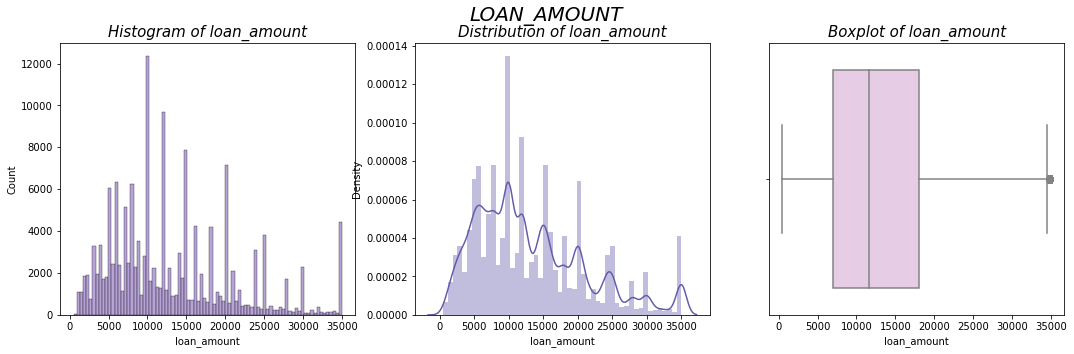

In [50]:
plot_data_new('loan_amount',colors_4)

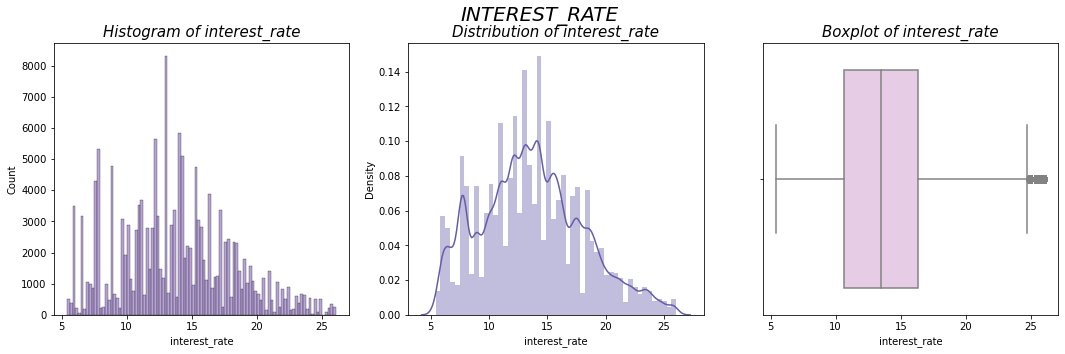

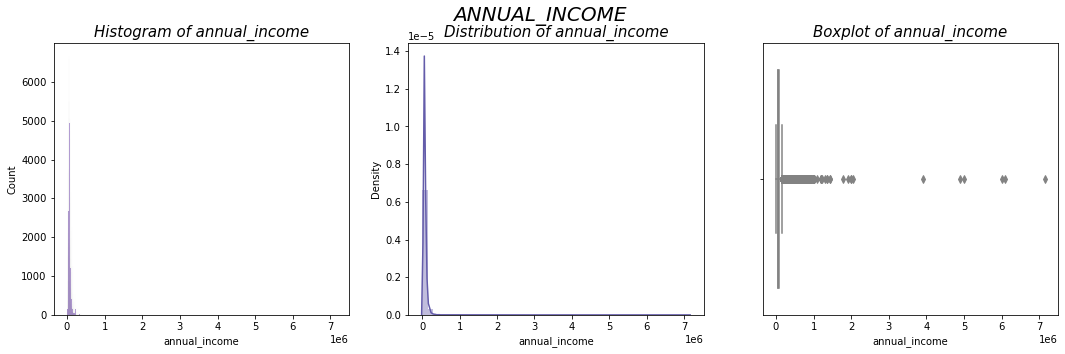

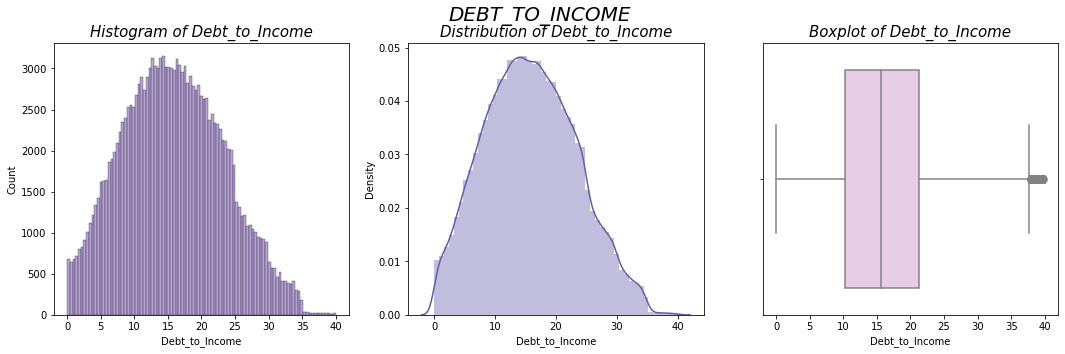

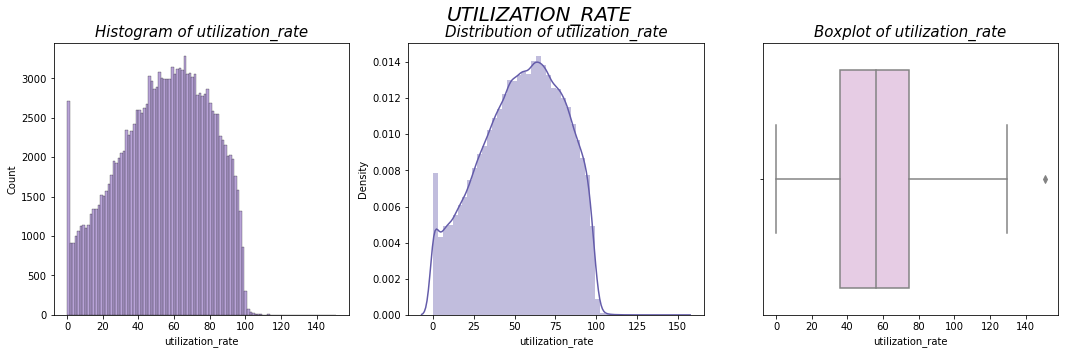

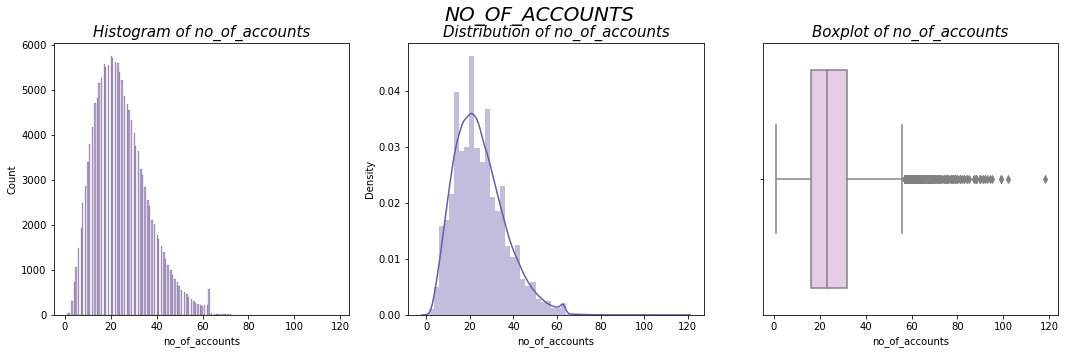

In [51]:
for col in df_numerical.drop('loan_amount',axis=1).columns:
    plot_data_new(col,colors_4)

## <span style="color:red" > Outlier Removal  <a class="anchor" id="Outlier_removal"></a>

In [52]:
# There are outliers in annual_income, utilization_rate,no_of_accounts
# Lets see one-by-one

In [53]:
print(df['annual_income'].quantile(0.7))
print(df['annual_income'].quantile(0.8))
print(df['annual_income'].quantile(0.9))

80000.0
95000.0
120000.0


In [54]:
df1 = df[df['annual_income']>df['annual_income'].quantile(0.95)]
df1.head()

loan_amount  term  interest_rate  employee_length home_ownership  \
67         14400    36         8.9000           0.0000            OWN   
73         35000    60        17.2700           3.0000       MORTGAGE   
155        25000    36        12.4200           2.0000           RENT   
169        35000    36        10.6500           2.0000       MORTGAGE   
272         8000    36        11.7100           1.0000           RENT   

     annual_income             purpose address_state  Debt_to_Income  \
67     150000.0000  debt_consolidation            NY         14.8500   
73     150000.0000    home_improvement            NY          7.5100   
155    225000.0000  debt_consolidation            NJ          8.3200   
169    168000.0000  debt_consolidation            TX          3.1700   
272    150000.0000         credit_card            NY          2.4800   

     due_count  utilization_rate  no_of_accounts  bad_loan  \
67      0.0000           55.0000         38.0000         0   
73      0.0000           53.3000         31.0000         0   
155     1.0000           34.6000         23.0000         0   
169     1.0000            1.4000         22.0000         0   
272     1.0000           56.2000          8.0000         0   

     longest_credit_length        status  
67                 17.0000      verified  
73                  8.0000      verified  
155                 7.0000      verified  
169                 9.0000      verified  
272                15.0000  not verified

In [55]:
# Dropping outliers
df.drop(df1.index,axis=0,inplace=True)

In [56]:
print(df['utilization_rate'].quantile(0.7))
print(df['utilization_rate'].quantile(0.8))
print(df['utilization_rate'].quantile(0.95))

70.4
78.2
92.4


In [57]:
df[df['utilization_rate']>df['utilization_rate'].quantile(0.97)].count()

loan_amount              4412
term                     4412
interest_rate            4412
employee_length          4412
home_ownership           4412
annual_income            4412
purpose                  4412
address_state            4412
Debt_to_Income           4412
due_count                4412
utilization_rate         4412
no_of_accounts           4412
bad_loan                 4412
longest_credit_length    4412
status                   4412
dtype: int64

In [58]:
df['utilization_rate'].max()

150.7

In [59]:
df2 = df[df['utilization_rate']>df['utilization_rate'].quantile(0.98)]
df2.head()

loan_amount  term  interest_rate  employee_length home_ownership  \
2          2400    36        15.9600          10.0000           RENT   
37         3000    36        18.2500           9.0000       MORTGAGE   
38         4400    36        16.7700          10.0000           RENT   
50        21000    60        19.9100           7.0000           RENT   
66        12000    36        16.7700           3.0000           RENT   

    annual_income             purpose address_state  Debt_to_Income  \
2      12252.0000      small_business            IL          8.7200   
37     65000.0000               other            PA         17.3900   
38     55000.0000  debt_consolidation            RI         20.0100   
50     50000.0000  debt_consolidation            WA         21.5800   
66     50000.0000         credit_card            MA         20.5700   

    due_count  utilization_rate  no_of_accounts  bad_loan  \
2      0.0000           98.5000         10.0000         0   
37     0.0000           98.1000         22.0000         0   
38     0.0000           99.0000         11.0000         0   
50     0.0000           97.6000         14.0000         1   
66     0.0000           97.0000         19.0000         0   

    longest_credit_length        status  
2                 10.0000  not verified  
37                13.0000  not verified  
38                 7.0000  not verified  
50                13.0000      verified  
66                 6.0000  not verified

In [60]:
df.drop(df2.index,axis=0,inplace=True)
df.head(2)

loan_amount  term  interest_rate  employee_length home_ownership  \
0         5000    36        10.6500          10.0000           RENT   
1         2500    60        15.2700           0.0000           RENT   

   annual_income      purpose address_state  Debt_to_Income  due_count  \
0     24000.0000  credit_card            AZ         27.6500     0.0000   
1     30000.0000          car            GA          1.0000     0.0000   

   utilization_rate  no_of_accounts  bad_loan  longest_credit_length    status  
0           83.7000          9.0000         0                26.0000  verified  
1            9.4000          4.0000         1                12.0000  verified

In [61]:
df3 = df[df['no_of_accounts']>df['no_of_accounts'].quantile(0.97)]
df1.head()

loan_amount  term  interest_rate  employee_length home_ownership  \
67         14400    36         8.9000           0.0000            OWN   
73         35000    60        17.2700           3.0000       MORTGAGE   
155        25000    36        12.4200           2.0000           RENT   
169        35000    36        10.6500           2.0000       MORTGAGE   
272         8000    36        11.7100           1.0000           RENT   

     annual_income             purpose address_state  Debt_to_Income  \
67     150000.0000  debt_consolidation            NY         14.8500   
73     150000.0000    home_improvement            NY          7.5100   
155    225000.0000  debt_consolidation            NJ          8.3200   
169    168000.0000  debt_consolidation            TX          3.1700   
272    150000.0000         credit_card            NY          2.4800   

     due_count  utilization_rate  no_of_accounts  bad_loan  \
67      0.0000           55.0000         38.0000         0   
73      0.0000           53.3000         31.0000         0   
155     1.0000           34.6000         23.0000         0   
169     1.0000            1.4000         22.0000         0   
272     1.0000           56.2000          8.0000         0   

     longest_credit_length        status  
67                 17.0000      verified  
73                  8.0000      verified  
155                 7.0000      verified  
169                 9.0000      verified  
272                15.0000  not verified

In [62]:
df.drop(df3.index,axis=0,inplace=True)

In [63]:
# Lets Encode all the variables:
df.head(2)

loan_amount  term  interest_rate  employee_length home_ownership  \
0         5000    36        10.6500          10.0000           RENT   
1         2500    60        15.2700           0.0000           RENT   

   annual_income      purpose address_state  Debt_to_Income  due_count  \
0     24000.0000  credit_card            AZ         27.6500     0.0000   
1     30000.0000          car            GA          1.0000     0.0000   

   utilization_rate  no_of_accounts  bad_loan  longest_credit_length    status  
0           83.7000          9.0000         0                26.0000  verified  
1            9.4000          4.0000         1                12.0000  verified

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_categorical.columns:
    df[col] = le.fit_transform(df[col])

In [65]:
df.head(2)

loan_amount  term  interest_rate  employee_length  home_ownership  \
0         5000     0        10.6500               10               3   
1         2500     1        15.2700                0               3   

   annual_income  purpose  address_state  Debt_to_Income  due_count  \
0     24000.0000        1              3         27.6500          0   
1     30000.0000        0             10          1.0000          0   

   utilization_rate  no_of_accounts  bad_loan  longest_credit_length  status  
0           83.7000          9.0000         0                     26       1  
1            9.4000          4.0000         1                     12       1

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for col in df_numerical.columns:
    df[col] = sc.fit_transform(df[[col]])

In [67]:
df.head(2)

loan_amount  term  interest_rate  employee_length  home_ownership  \
0      -1.0088     0        -0.6879               10               3   
1      -1.3357     1         0.3746                0               3   

   annual_income  purpose  address_state  Debt_to_Income  due_count  \
0        -1.4729        1              3          1.5476          0   
1        -1.2557        0             10         -1.9897          0   

   utilization_rate  no_of_accounts  bad_loan  longest_credit_length  status  
0            1.2282         -1.4110         0                     26       1  
1           -1.7910         -1.9002         1                     12       1

In [68]:
# We dont require due count, So lets remove it.
df.drop('due_count',axis=1,inplace=True)

## <span style="color:brown">Automated EDA  <a class="anchor" id="Automated_EDA"></a>

<div  class="alert alert-block alert-warning"> Now that we have seen manual plotting and Data preprocessing. Lets see the inferences from automated libraries.
    We shall use <b> Dataprep, Pandas-Profiling, Sweetviz </b>libraries now
</div>

In [69]:
# Install the below libraries using the below code
# pip install dataprep

In [1]:
# Unhash to run it...
# import dataprep
# from dataprep.eda import create_report
# create_report(df)

In [71]:
# Install the below libraries using the below code
# pip install pandas-profiling

In [2]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file('output.html')
# profile

In [73]:
# Install the below libraries using the below code
# pip install sweetviz 

In [3]:
# import sweetviz as sv
# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
# check the local depository to open this again

## <span style="color:green"> Feature Engineering  
 <a class="anchor" id="Feature_Engineering"></a>

In [75]:
df.head(2)

loan_amount  term  interest_rate  employee_length  home_ownership  \
0      -1.0088     0        -0.6879               10               3   
1      -1.3357     1         0.3746                0               3   

   annual_income  purpose  address_state  Debt_to_Income  utilization_rate  \
0        -1.4729        1              3          1.5476            1.2282   
1        -1.2557        0             10         -1.9897           -1.7910   

   no_of_accounts  bad_loan  longest_credit_length  status  
0         -1.4110         0                     26       1  
1         -1.9002         1                     12       1

## Correlation

In [76]:
# Style change - Look for more styles - 'ggplot','dark_background','Solarize_Light2','bmh','grayscale' etc..,
plt.style.use('fivethirtyeight')

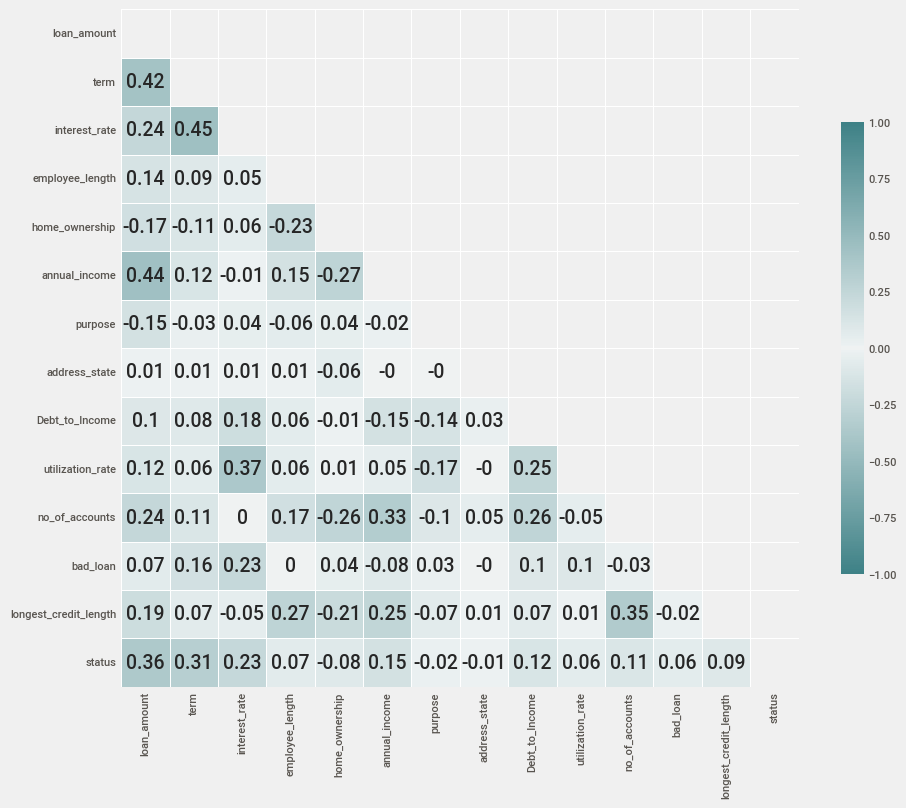

In [77]:
corr = df.corr().round(2)
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig11,ax11 = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,200,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmin=-1,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":0.5},annot=True)
plt.tight_layout()
plt.show()

In [78]:
df.head(2)

loan_amount  term  interest_rate  employee_length  home_ownership  \
0      -1.0088     0        -0.6879               10               3   
1      -1.3357     1         0.3746                0               3   

   annual_income  purpose  address_state  Debt_to_Income  utilization_rate  \
0        -1.4729        1              3          1.5476            1.2282   
1        -1.2557        0             10         -1.9897           -1.7910   

   no_of_accounts  bad_loan  longest_credit_length  status  
0         -1.4110         0                     26       1  
1         -1.9002         1                     12       1

##   <mark><span style="color:orange">Feature Importances</span></mark>

 <mark>**1. Using Decision tree** </mark>

In [79]:
# For finding important features, we need to seperate the dataframe
X = df.drop('status',axis=1)
y = df['status']

In [80]:
# Decision Tree instance
dtree = DecisionTreeClassifier()
# fit the model
dtree.fit(X,y)
# Find the important features using feature_importances_
Important_features_tree = dtree.feature_importances_
Important_features_tree

array([0.18881186, 0.04753432, 0.09753386, 0.04392944, 0.01416232,
       0.09641522, 0.03194921, 0.07153641, 0.13469518, 0.11475125,
       0.08059189, 0.00982039, 0.06826864])

In [81]:
# Attach the columns of X to the feature importance labels
columns = X.columns
# Converting into a dataframe
feature_importance_tree = pd.DataFrame(Important_features_tree)
# Attach columns to it
feature_importance_tree['columns'] = columns.T

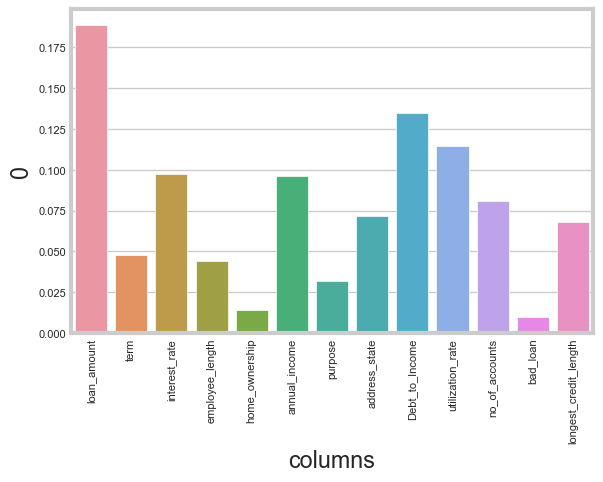

In [82]:
# Lets plot a barplot to visualize the important features
sns.set_style('whitegrid')
# Bar plot
sns.barplot(data=feature_importance_tree,x='columns',y=feature_importance_tree[0])
# rotate the labels
plt.xticks(rotation=90)
plt.show()

In [83]:
# Random Forest instance
rf = RandomForestClassifier()
# fit the model
rf.fit(X,y)
# Find the important features using feature_importances_
Important_features_rf = rf.feature_importances_
Important_features_rf

array([0.17171817, 0.05244237, 0.11211783, 0.04866076, 0.01741794,
       0.09740647, 0.03640027, 0.07148445, 0.12434679, 0.10671844,
       0.0798588 , 0.01027702, 0.07115069])

In [84]:
# Attach the columns of X to the feature importance labels
columns = X.columns
# Converting into a dataframe
feature_importance_rf = pd.DataFrame(Important_features_rf)
# Attach columns to it
feature_importance_rf['columns'] = columns.T

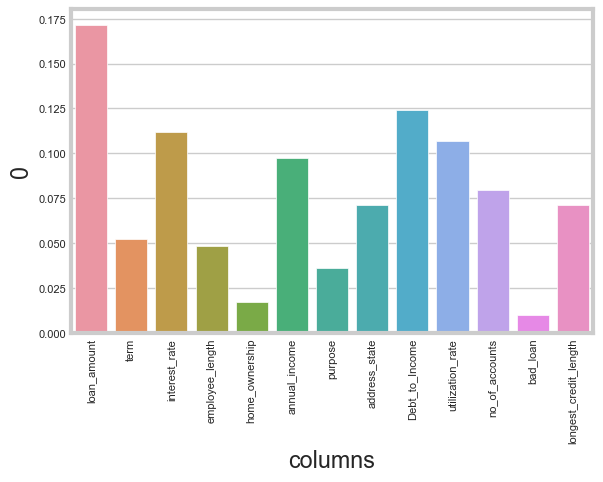

In [85]:
# Lets plot a barplot to visualize the important features
sns.set_style('whitegrid')
# Bar plot
sns.barplot(data=feature_importance_rf,x='columns',y=feature_importance_rf[0])
# rotate the labels
plt.xticks(rotation=90)
plt.show()

## <span style="color:blue">Model Building

In [86]:
# Splitting the X,y into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(121484, 13) (21439, 13) (121484,) (21439,)


In [89]:
# Lets first create a basic AdaBoost instance and build a model
#The most important parameters are base_estimator, n_estimators, and learning_rate
# AdaBoost has its default base estimator as decision tree
# Create AdaBoost classifier object with 300 decision tree estimator at a learning rate=1
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=20, max_leaf_nodes=2, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
clf = 'Gradient Boosting'
# model_eval(clf, y_test, y_pred)
# Train Adaboost Classifer
model1 = gbc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [91]:
dict_results = {'Predicted':y_pred,'Actual':y_test}
results = pd.DataFrame(dict_results)
results

Predicted  Actual
127070          1       0
107028          1       1
102886          1       1
163176          1       0
70223           0       0
...           ...     ...
30859           1       0
114381          0       0
16106           1       0
46407           0       0
122369          0       0

[21439 rows x 2 columns]

In [92]:
pd.crosstab(y_pred,y_test)

status     0     1
row_0             
0       5287  3720
1       3014  9418

##  <span style ="color:orange"> Evaluation Metrics

In [ ]:
# We can also plot feature importances using AdaBoost model
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(gbm.feature_importances_, X.columns, 'GRADIENT BOOSTING')

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Confusion Matrix for dtree model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1,X_test,y_test,values_format='d',display_labels=['0','1'])

In [ ]:
# Funtion to calculate True Positive Rate and False Positive Rate
def calculate_tpr_fpr(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    # True Negative
    TN = cm[0, 0]
    # False Positive
    FP = cm[0, 1]
    # False Negative
    FN = cm[1, 0]
    # True Positive
    TP = cm[1, 1]
    # Calculates TPR and FPR
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    return tpr, fpr

# Function to retrieve ROC Coordinates
def get_all_roc_coordinates(y_real, y_proba):
    # making a list of True positive rate values
    tpr_list = [0]
    # making of list of False positive rate values
    fpr_list = [0]
    # for all the values in the probability list for the test data calculated
    for i in range(len(y_proba)):
        # We define a threshold probability
        threshold = y_proba[i]
        # If its next values are greater than threshold, its 1 else 0
        y_pred = y_proba >= threshold
        # Use the above function to get the TPR and FPR values
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        # Append them to this list
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        # Finally return the list as these are the axes for roc curves
    return tpr_list, fpr_list

# Function to plot ROC Curve from the above lists
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        # By default, size the figure to plot if there are no data given to axes
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
        
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
        # Plot a lineplot with the lists retrieved earlier
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    # set x-axis and y-axis limits
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    # Set labels for x-axes and y-axes
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
# Plot ROC-AUC Curve for dtree model
# Since it is a multiclass model, we will use Binary format that One-vs-One or One-vs-Rest models
# One-vs-Rest (OvR) explains the class against the rest of the model
# One-vs-One (OvO) explains the class against other class
# Plots the Probability Distributions and the ROC Curves One vs Rest

plt.figure(figsize=(12,8))
# Defining the bins for the histogram
bins = [i/20 for i in range(20)]+[1]
# list of classes in the model
classes = model1.classes_
# probability of data belonging to the each class
y_proba = model1.predict_proba(X_test)
roc_auc_ovr = {}

# For every class,
for i in range(len(classes)):
    c = classes[i]
    
    # Take a copy of the X-test
    df_aux = X_test.copy()
    # If the data belongs to that class its 1, else 0
    # We are converting the multiclass classification to the Binary format - This is OvR classification
    df_aux['class'] = [1 if y==c else 0 for y in y_test]
    # probability value of that class is attached to the dataframe
    df_aux['prob'] = y_proba[:,i]
    # set the index to default
    df_aux = df_aux.reset_index(drop=True)
    
    # Plots the probability distribution for the class and the rest
    # subplots- row, columns, iteration number
    ax = plt.subplot(2,3,i+1)
    # Histogram for each class given probability
    sns.histplot(x='prob',data=df_aux,hue='class',color='b',ax=ax,bins=bins)
    ax.set_title(c)
    # Legend set for every plot
    leg = ax.legend([f"class:{c}","Rest"])
    for text in leg.get_texts():
        text.set_color("black")
    ax.set_xlabel(f"P(x= {c})")
    
    # Calculates the ROC coordinates and plots the ROC curves
    ax_bottom = plt.subplot(2,3,i+4)
    # plot roc curve using above defined functions
    tpr,fpr = get_all_roc_coordinates(df_aux['class'],df_aux['prob'])
    plot_roc_curve(tpr,fpr,scatter=False,ax=ax_bottom)
    bottom = ax_bottom.set_title("ROC Curve",color='black')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'],df_aux['prob'])
plt.tight_layout()  
plt.show()

In [ ]:
# Displays the ROC AUC for each class
# Our dataset is too small for GradientBoost algorithm, the same for the larger datasets will not be same
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    # iterate the values
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

In [ ]:
# F1-score is the harmonic mean of the precision and recall to balance the trade-off between them
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

In [ ]:
# Preparing classification report for the model with dtree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
XX = sc.fit_transform(df.drop('status',axis=1))
XX

In [ ]:
df.head(2)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

n_classes = 3; # We have three classes
n_estimators = 100; # Consider 300 estimators decision tree by default
cmap = plt.cm.RdYlBu # selecting cmap
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration
plot_idx = 1

models = [DecisionTreeClassifier(max_depth=3),RandomForestClassifier(n_estimators=n_estimators),
    GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)]

pqr = sc.fit_transform(df.drop('status',axis=1))

for pair in ([0,2], [0,8], [5,8], [5,9]):
    for model in models:
        # We only take the two corresponding features
        XX = pqr[:,pair]
        yy = np.asarray(df['status'])

        # Shuffle
        idx = np.arange(XX.shape[0]) # No of rows
        np.random.seed(RANDOM_SEED) # a seed value(random) for a random value generator
        np.random.shuffle(idx)
        XX = XX[idx]
        yy = yy[idx]
        # Training the model
        model.fit(XX, yy)

        # getting score for the model
        scores = model.score(XX,yy)
        # Output of the below will be statement similar to  - ["<class 'sklearn", 'ensemble', '_weight_boosting', "AdaBoostClassifier'>"]
        # Example, We are processing to get title 'AdaBoost' from the list of strings
        # slicing away the useless parts of the string 
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]
        model_details = model_title
        # If the model has the attributes 'estimators_' (means if its true): then proceed...
        if hasattr(model, "estimators_"):
            # Adding the models estimators to the title
            model_details += " with {} estimators".format(len(model.estimators_))
            # printing the scores of the model with the title framed
            print(model_details + " with features", pair, "has a score of", scores)
        
        # defining subplots for each pair of features with the model 
        plt.subplot(4, 3, plot_idx)
        # If plot index is less than the limit:
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9,color='black')
            
        # Now plot the decision boundary using a fine mesh as input to a filled contour plot
        # Of the pair of features, first feature --> xx, second feature --> yy
        x_min, x_max = XX[:, 0].min() - 1, XX[:, 0].max() + 1
        y_min, y_max = XX[:, 1].min() - 1, XX[:, 1].max() + 1
        # Building a meshgrid for the plots between the range with plot_step defined
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        
        # np.c_ : Translates slice objects to concatenation along the second axis.
        # Example, [[1,2,3],[4,5,6]] --> [[1,4],[2,5],[3,6]] using np.c_ function
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # Reshaping to perfectly fit in the data
        Z = Z.reshape(xx.shape)
        # Contouring done here
        cs = plt.contourf(xx, yy, Z, cmap=cmap)

                
        # Build a coarser grid to plot a set of ensemble classifications to show how these are different to what we see in the decision surfaces
        # These points are regularly space and do not have a black outline
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),np.arange(y_min, y_max, plot_step_coarser),)
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser,yy_coarser,s=15,c=Z_points_coarser,cmap=cmap,edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(XX[:, 0],XX[:, 1],c=y,cmap=ListedColormap(["r", "y", "b"]),edgecolor="k",s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Wine dataset", fontsize=12,color='black')
plt.axis("tight")
plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=0.5)
plt.show()

##  <span  style="color:purple"> Hyperparameter tuning

In [ ]:
## Tuning n_estimators and Learning rate
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate
def get_models():
    # Models with different estimators are taken into a dictionary
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        # Appending them 
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

<mark>n_estimators is the number of trees (weak learners) that we want to add in the model. There are no optimum values for learning rate as low values always work better, given that we train on sufficient number of trees. A high number of trees can be computationally expensive that’s why I have taken few number of trees here.

In [ ]:
# plot model performance for comparison
import plotly.graph_objects as go
# Initiate graph objects
fig = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig.update_xaxes(title_text = "No of n_estimators",title_font = {"size": 20},title_standoff = 25)
fig.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig.show()

In [ ]:
# Building a model for observing accuracies for different depths with different cross validation models
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,6):
        # define ensemble model
        models[str(i)] = GradientBoostingClassifier(max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# Initiate graph objects
fig1 = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig1.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig1.update_xaxes(title_text = "Train depths",title_font = {"size": 20},title_standoff = 25)
fig1.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig1.show()

In [ ]:
# Finding best learning rate 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

In [ ]:
# Initiate graph objects
fig2 = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig2.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig2.update_xaxes(title_text = "Learning rate",title_font = {"size": 20},title_standoff = 25)
fig2.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig2.show()

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# define the model with default hyperparameters
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
fig9 = go.Figure()
fig9.add_trace(go.Scatter(y=means,mode='lines+markers',name='Means of the results'))
fig9.add_trace(go.Scatter(y=stds,mode='lines+markers',name='Standard Deviations results'))
fig9.update_layout(title="Means and Stds of results")
fig9.show()